<a href="https://colab.research.google.com/github/Gaurav1401/Deep-Learning/blob/main/Practice/Classification/Classification_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
import warnings as wg
wg.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


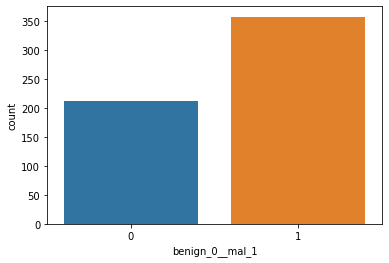

In [5]:
sns.countplot(x = 'benign_0__mal_1', data = df)

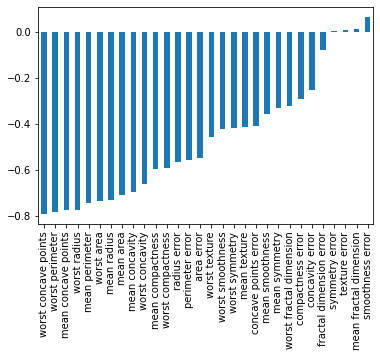

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

In [11]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [26]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [23]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary CLassification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [25]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6608 - val_loss: 0.6394
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6218 - val_loss: 0.6022
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.5554
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5275 - val_loss: 0.5008
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4718 - val_loss: 0.4438
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4186 - val_loss: 0.3896
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3686 - val_loss: 0.3424
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3280 - val_loss: 0.3018
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2941 - val_loss: 0.2696
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2683 - val_loss: 0.2449
Epoch 11

In [27]:
losses = pd.DataFrame(model.history.history)

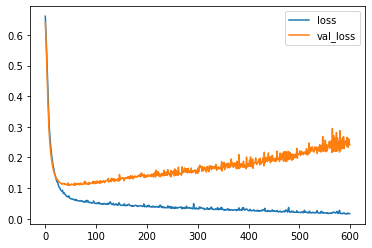

In [29]:
losses.plot()

**As we can clearly see here that our model is overfitting the data**

**Hence, we need to use early stopping to decide the ideal number of epochs**

In [30]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary CLassification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [34]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6662 - val_loss: 0.6376
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6274 - val_loss: 0.6019
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5876 - val_loss: 0.5592
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5427 - val_loss: 0.5114
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4964 - val_loss: 0.4631
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4497 - val_loss: 0.4164
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4072 - val_loss: 0.3759
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3711 - val_loss: 0.3344
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3382 - val_loss: 0.3027
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2981 - val_loss: 0.2674
Epoch 11

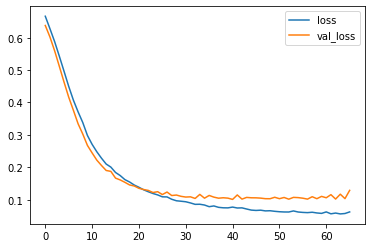

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary CLassification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [38]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.6846 - val_loss: 0.6882
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6835 - val_loss: 0.6653
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6723 - val_loss: 0.6404
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6422 - val_loss: 0.6158
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5826
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5958 - val_loss: 0.5492
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5860 - val_loss: 0.5258
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5576 - val_loss: 0.5041
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5565 - val_loss: 0.4867
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5227 - val_loss: 0.4639
Epoch 11

In [39]:
model_loss = pd.DataFrame(model.history.history)

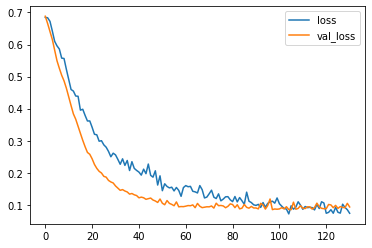

In [40]:
model_loss.plot()

In [51]:
predictions = model.predict_classes(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [54]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
